## RFM Analysis

- **Recency** – How recently did the customer purchase?
- **Frequency** – How often do they purchase?
- **Monetary Value** – How much do they spend?

### Importing Packages

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Loading the Data

In [3]:
data = pd.read_excel("/kaggle/input/online-retail-ii-dataset/online_retail_II.xlsx",sheet_name="Year 2010-2011")
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.shape

(541910, 8)

In [5]:
data.isna().sum() / len(data) * 100

Invoice         0.000000
StockCode       0.000000
Description     0.268310
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    24.926648
Country         0.000000
dtype: float64

In [6]:
data.dropna(inplace=True)

In [7]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,406830.0,12.061276,-80995.0,2.0,5.0,12.0,80995.0,248.693065
InvoiceDate,406830,2011-07-10 16:31:30.127424512,2010-12-01 08:26:00,2011-04-06 15:02:00,2011-07-31 11:48:00,2011-10-20 13:06:00,2011-12-09 12:50:00,NaN
Price,406830.0,3.460507,0.0,1.25,1.95,3.75,38970.0,69.31508
Customer ID,406830.0,15287.68416,12346.0,13953.0,15152.0,16791.0,18287.0,1713.603074


In [32]:
data['Total_Price'] = data['Quantity'] * data['Price']

### Outlier Detection

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406830 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      406830 non-null  object        
 1   StockCode    406830 non-null  object        
 2   Description  406830 non-null  object        
 3   Quantity     406830 non-null  int64         
 4   InvoiceDate  406830 non-null  datetime64[ns]
 5   Price        406830 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      406830 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


<Axes: xlabel='Price'>

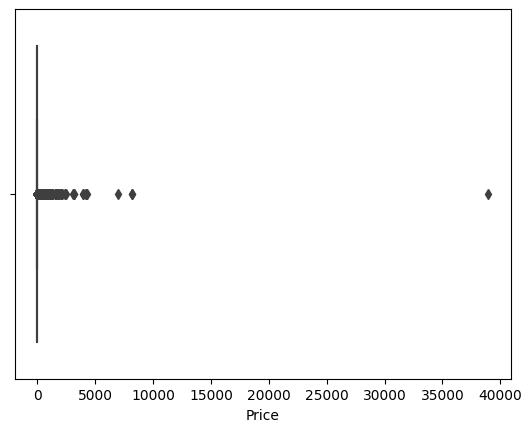

In [11]:
sns.boxplot(data = data,x = 'Price')

Text(0.5, 1.0, 'Quantity distribution')

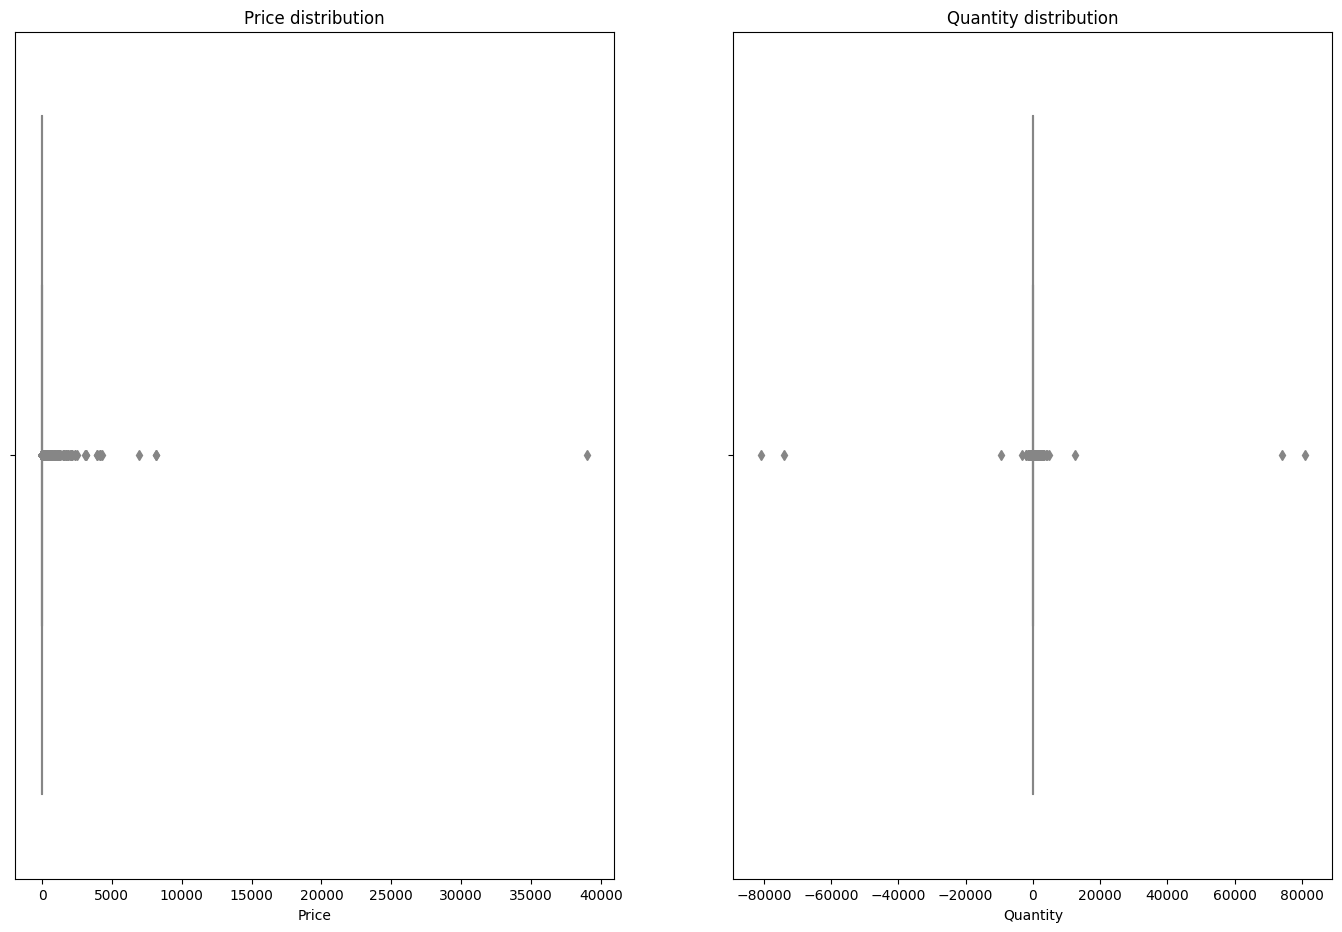

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(17,11))

sns.boxplot(ax=axes[0], data=data, x='Price',palette='Spectral')
axes[0].set_title("Price distribution")

sns.boxplot(ax=axes[1], data=data, x='Quantity',palette='Spectral')
axes[1].set_title("Quantity distribution")

### RFM

In [25]:
recency = (dt.datetime(2011, 12, 9) - data.groupby("Customer ID").agg({"InvoiceDate":"max"})).rename(columns = {"InvoiceDate":"Recency"})

In [26]:
recency["Recency"] = recency["Recency"].apply(lambda x: x.days)
recency

,Recency
Customer ID,
12346.0,324
12347.0,1
12348.0,74
12349.0,17
12350.0,309
...,...
18280.0,276
18281.0,179
18282.0,6


In [30]:
frequency = data.groupby('Customer ID').agg({'InvoiceDate':'nunique'}).rename(columns={'InvoiceDate':'Frequency'})
frequency

,Frequency
Customer ID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1
...,...
18280.0,1
18281.0,1
18282.0,3


In [34]:
monetary = data.groupby("Customer ID").agg({'Total_Price':'sum'}).rename(columns={'Total_Price':'monetary'})
monetary

,monetary
Customer ID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [35]:
RFM = pd.DataFrame()
RFM = pd.concat([recency,frequency,monetary],axis=1)

In [36]:
RFM

,Recency,Frequency,monetary
Customer ID,,,
12346.0,324,2,0.00
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,17,1,1757.55
12350.0,309,1,334.40
...,...,...,...
18280.0,276,1,180.60
18281.0,179,1,80.82
18282.0,6,3,176.60


### Creating RFM Score

In [38]:
RFM['Rec_Score'] = pd.qcut(RFM['Recency'],5,labels=[5,4,3,2,1])
RFM['Freq_Score'] = pd.qcut(RFM['Frequency'].rank(method="first"),5,labels=[1,2,3,4,5])
RFM['Mon_Score'] = pd.qcut(RFM['monetary'],5,labels=[1,2,3,4,5])
RFM

,Recency,Frequency,monetary,Rec_Score,Freq_Score,Mon_Score
Customer ID,,,,,,
12346.0,324,2,0.00,1,2,1
12347.0,1,7,4310.00,5,4,5
12348.0,74,4,1797.24,2,3,4
12349.0,17,1,1757.55,4,1,4
12350.0,309,1,334.40,1,1,2
...,...,...,...,...,...,...
18280.0,276,1,180.60,1,2,1
18281.0,179,1,80.82,1,2,1
18282.0,6,3,176.60,5,3,1


In [39]:
RFM["RFM_SCORE"] = (RFM['Rec_Score'].astype(str) + 
                     RFM['Freq_Score'].astype(str) + 
                     RFM['Mon_Score'].astype(str))
RFM

,Recency,Frequency,monetary,Rec_Score,Freq_Score,Mon_Score,RFM_SCORE
Customer ID,,,,,,,
12346.0,324,2,0.00,1,2,1,121
12347.0,1,7,4310.00,5,4,5,545
12348.0,74,4,1797.24,2,3,4,234
12349.0,17,1,1757.55,4,1,4,414
12350.0,309,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...
18280.0,276,1,180.60,1,2,1,121
18281.0,179,1,80.82,1,2,1,121
18282.0,6,3,176.60,5,3,1,531


In [40]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [41]:
RFM['Segment'] = RFM['Rec_Score'].astype(str) + RFM['Freq_Score'].astype(str)
RFM['Segment'] = RFM['Segment'].replace(seg_map, regex=True)

In [42]:
RFM

,Recency,Frequency,monetary,Rec_Score,Freq_Score,Mon_Score,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346.0,324,2,0.00,1,2,1,121,Hibernating
12347.0,1,7,4310.00,5,4,5,545,Champions
12348.0,74,4,1797.24,2,3,4,234,At Risk
12349.0,17,1,1757.55,4,1,4,414,Promising
12350.0,309,1,334.40,1,1,2,112,Hibernating
...,...,...,...,...,...,...,...,...
18280.0,276,1,180.60,1,2,1,121,Hibernating
18281.0,179,1,80.82,1,2,1,121,Hibernating
18282.0,6,3,176.60,5,3,1,531,Potential Loyalists


In [45]:
rfmStats = RFM[["Segment","Recency","Frequency", "monetary"]].groupby("Segment").agg(["mean","median","count", "std"])
rfmStats.columns = rfmStats.columns.map('_'.join).str.strip('|')

In [46]:
rfmStats

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,monetary_mean,monetary_median,monetary_count,monetary_std
Segment,,,,,,,,,,,,
About to Sleep,51.097297,51.0,370,11.083876,1.289189,1.0,370,0.454000,435.288000,327.195,370,469.288605
At Risk,156.541254,140.0,606,72.715482,3.313531,3.0,606,1.224022,948.964228,632.780,606,1322.564937
Can't Loose,133.848485,106.0,66,67.492505,9.803030,8.0,66,4.199706,2431.869848,1891.295,66,1961.591699
Champions,4.075188,3.0,665,3.449341,14.445113,9.0,665,19.374801,6510.571068,2531.580,665,19403.810893
Hibernating,216.185361,217.0,1052,92.056755,1.202471,1.0,1052,0.402033,376.141493,266.685,1052,526.393849
Loyal Customers,31.364780,27.0,795,16.033820,7.938365,6.0,795,5.641246,2706.464693,1708.860,795,5429.172902
Need Attention,47.529412,45.0,187,11.543417,2.631016,3.0,187,0.483825,774.944225,598.830,187,599.337540
New Customers,5.238095,6.0,42,3.701084,1.000000,1.0,42,0.000000,377.234286,246.810,42,574.982985
Potential Loyalists,14.613821,15.0,492,9.310947,2.213415,2.0,492,0.682322,683.793821,486.300,492,852.445376


### Viz - RFM Stat

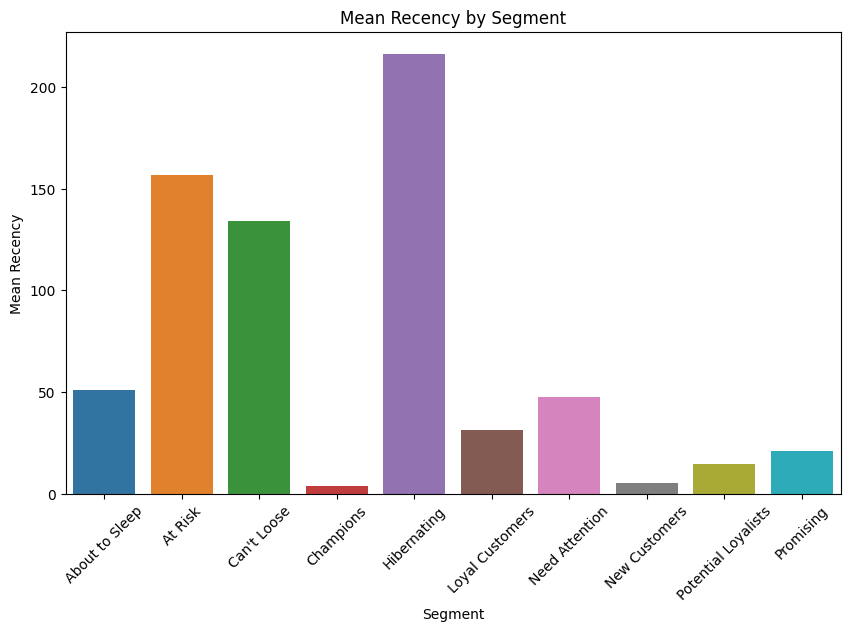

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x=rfmStats.index, y='Recency_mean', data=rfmStats)
plt.title('Mean Recency by Segment')
plt.xlabel('Segment')
plt.ylabel('Mean Recency')
plt.xticks(rotation=45)
plt.show()

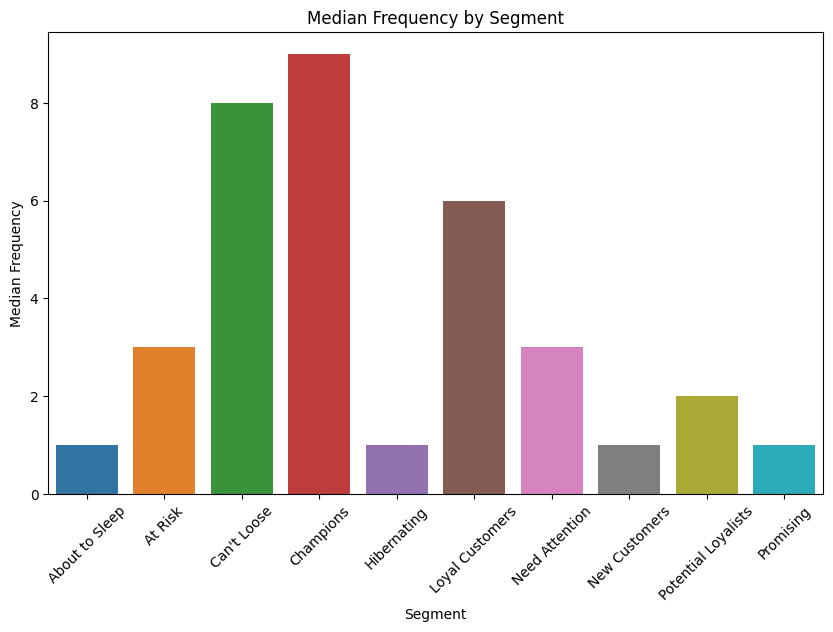

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x=rfmStats.index, y='Frequency_median', data=rfmStats)
plt.title('Median Frequency by Segment')
plt.xlabel('Segment')
plt.ylabel('Median Frequency')
plt.xticks(rotation=45)
plt.show()

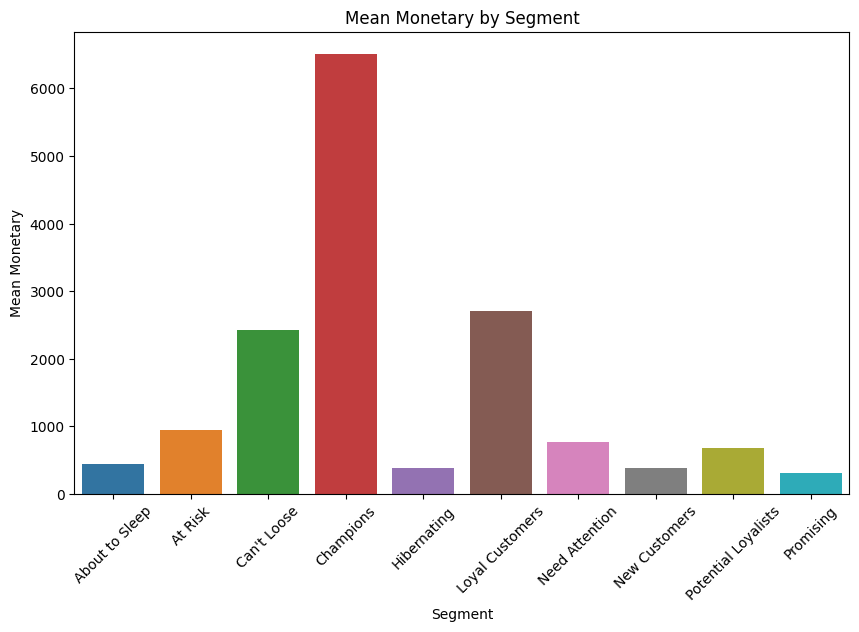

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x=rfmStats.index, y='monetary_mean', data=rfmStats)
plt.title('Mean Monetary by Segment')
plt.xlabel('Segment')
plt.ylabel('Mean Monetary')
plt.xticks(rotation=45)
plt.show()